In [26]:
import math
import os

import pandas as pd
from scipy.stats import gamma
from scipy.stats import lognorm
from scipy.stats import norm
from Util import normalize
import matplotlib.pyplot as plt
import numpy as np
import Parameters
import datetime
import cv2

In [27]:
path = os.getcwd()[:-5] + 'Model Dependencies/Ontario_commute.csv'
df = pd.read_csv(path)
print(df)

      GEO_CODE_(POR)           GEO_NAME  GEO_CODE_(POW)         GEO_NAME.1  \
0            3501005    South_Glengarry         3520005            Toronto   
1            3501005    South_Glengarry         3507015         Brockville   
2            3501005    South_Glengarry         3506008             Ottawa   
3            3501005    South_Glengarry         3502010          Champlain   
4            3501005    South_Glengarry         3502008         Hawkesbury   
...              ...                ...             ...                ...   
5210         3560095      Bearskin_Lake         3560095      Bearskin_Lake   
5211         3560096    Kasabonika_Lake         3560096    Kasabonika_Lake   
5212         3560097   Muskrat_Dam_Lake         3560097   Muskrat_Dam_Lake   
5213         3560098  Kingfisher_Lake_1         3560098  Kingfisher_Lake_1   
5214         3560104        Kee-Way-Win         3560104        Kee-Way-Win   

      Dim:_Sex_(3):_Member_ID:_[1]:_Total_-_Sex  \
0           

In [28]:
df['District (POR)'] = (df['GEO_CODE_(POR)'] / 1000).astype(int)
df['District (POW)'] = (df['GEO_CODE_(POW)'] / 1000).astype(int)

In [29]:
PORs = []
POWs = []
for i in range(len(df)):
    row = df.iloc[i]
    # print(row)
    if row['District (POR)'] not in PORs:
        PORs.append(row['District (POR)'])
    if row['District (POW)'] not in POWs:
        POWs.append(row['District (POW)'])

In [30]:
rslt = np.ones(shape=(len(PORs), len(POWs)), dtype=int)
for i in range(len(df)):
    row = df.iloc[i]
    POR_ind =  PORs.index(row['District (POR)'])
    POW_ind =  POWs.index(row['District (POW)'])
    rslt[POR_ind][POW_ind] += row['Dim:_Sex_(3):_Member_ID:_[1]:_Total_-_Sex']

In [31]:
rslt_file = []
for i in PORs:
    for j in POWs:
        rslt_row = [i, j, rslt[PORs.index(i)][POWs.index(j)]]
        rslt_file.append(rslt_row)

In [32]:
df = pd.DataFrame(rslt_file, columns=["POR", "POW", "Total_worker"])

In [33]:
df.to_csv(os.getcwd()[:-5] + 'Model Dependencies/Ontario_commute_district.csv')

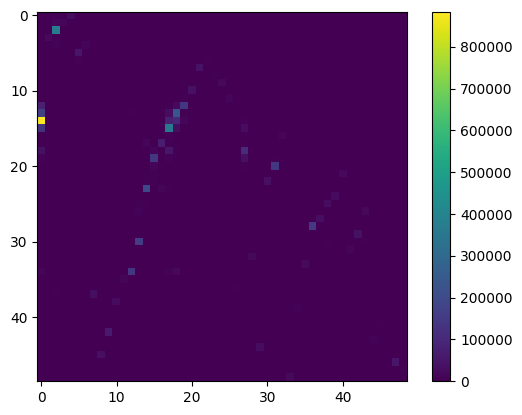

In [20]:
plt.imshow(rslt)
plt.colorbar()
plt.show()

In [ ]:
new_df = rslt.